Loading model from: ..\artifacts\best_model.pkl
Loading preprocessor from: ..\artifacts\preprocessor.pkl
Loading test data from: ..\artifacts\test.csv
Files loaded successfully!
Transforming test data and making predictions...
Prediction complete.
Generating plot...


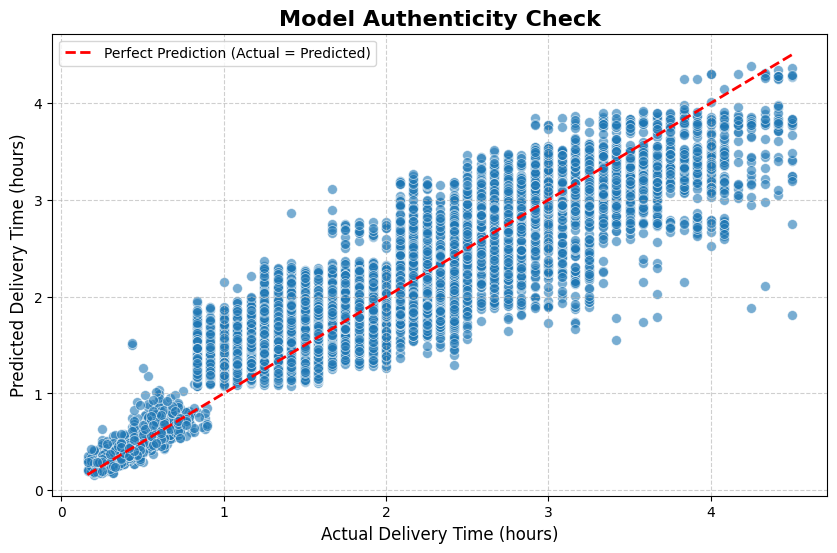

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils import load_object
import os

# --- 1. DEFINE CORRECT FILE PATHS ---
# We use '../' to go "up" one folder from the 'notebooks' directory
# to the main 'Logistic Project/' folder.
model_path = os.path.join("..", "artifacts", "best_model.pkl")
preprocessor_path = os.path.join("..", "artifacts", "preprocessor.pkl")
test_data_path = os.path.join("..", "artifacts", "test.csv")

print(f"Loading model from: {model_path}")
print(f"Loading preprocessor from: {preprocessor_path}")
print(f"Loading test data from: {test_data_path}")

# --- 2. LOAD YOUR SAVED OBJECTS ---
try:
    model = load_object(file_path=model_path)
    preprocessor = load_object(file_path=preprocessor_path)
    test_df = pd.read_csv(test_data_path)
    print("Files loaded successfully!")

except Exception as e:
    print(f"--- ERROR ---")
    print(f"Could not load files. Make sure you have run 'train_pipeline.py' successfully.")
    print(f"Error message: {e}")
    
# --- 3. SEPARATE FEATURES (X) AND TARGET (y) ---
# We use the raw 'test.csv' data, just as it was saved
# (This assumes 'Delivery_Time_hour' is the target. Adjust if yours is different)
target_column = "Delivery_Time_hour"

# Check if the target column is in the dataframe
if target_column not in test_df.columns:
    print(f"Error: Target column '{target_column}' not in test.csv!")
else:
    y_test = test_df[target_column]
    X_test = test_df.drop(target_column, axis=1)

    # --- 4. RUN THE PREDICTION PIPELINE ---
    print("Transforming test data and making predictions...")
    
    # Use the loaded preprocessor to transform the test features
    X_test_processed = preprocessor.transform(X_test)
    
    # Use the loaded model to make predictions
    y_pred = model.predict(X_test_processed)
    
    print("Prediction complete.")

    # --- 5. CREATE THE AUTHENTICITY PLOT ---
    print("Generating plot...")
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, s=50) # x=Actual, y=Predicted
    
    # Add a 45-degree "perfect prediction" line
    perfect_line_start = min(y_test.min(), y_pred.min())
    perfect_line_end = max(y_test.max(), y_pred.max())
    plt.plot([perfect_line_start, perfect_line_end], 
             [perfect_line_start, perfect_line_end], 
             'r--', lw=2, label='Perfect Prediction (Actual = Predicted)')
    
    plt.title("Model Authenticity Check", fontsize=16, weight='bold')
    plt.xlabel("Actual Delivery Time (hours)", fontsize=12)
    plt.ylabel("Predicted Delivery Time (hours)", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

In [7]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(r2, mae, rmse)


0.817366498958414 0.284960920768905 0.3677512642005973


Checking if the model is overtrained or undertrained

In [9]:
import pandas as pd
import numpy as np
import os
from src.utils import load_object # Make sure utils.py uses pickle.load
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# --- 1. DEFINE FILE PATHS (from 'notebooks' folder) ---
model_path = os.path.join("..", "artifacts", "best_model.pkl")
preprocessor_path = os.path.join("..", "artifacts", "preprocessor.pkl")
train_data_path = os.path.join("..", "artifacts", "train.csv")
test_data_path = os.path.join("..", "artifacts", "test.csv")
target_column = "Delivery_Time_hour"

print("Loading all artifacts...")
try:
    # --- 2. LOAD TOOLS AND DATA ---
    model = load_object(file_path=model_path)
    preprocessor = load_object(file_path=preprocessor_path)
    train_df = pd.read_csv(train_data_path)
    test_df = pd.read_csv(test_data_path)
    print("Files loaded successfully!")
except Exception as e:
    print(f"ERROR: Could not load files. {e}")
    # This will stop the cell if files aren't found
    raise

# --- 3. PROCESS TRAINING DATA ---
print("\nProcessing Training Data...")
# Split Train data
y_train = train_df[target_column]
X_train = train_df.drop(target_column, axis=1)
# Process and Predict Train data
X_train_processed = preprocessor.transform(X_train)
y_pred_train = model.predict(X_train_processed)

# --- 4. PROCESS TESTING DATA ---
print("Processing Testing Data...")
# Split Test data
y_test = test_df[target_column]
X_test = test_df.drop(target_column, axis=1)
# Process and Predict Test data
X_test_processed = preprocessor.transform(X_test)
y_pred_test = model.predict(X_test_processed)

# --- 5. CALCULATE METRICS FOR BOTH ---
print("Calculating metrics...")

# Training Data Metrics
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Test Data Metrics
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# --- 6. DISPLAY COMPARISON TABLE ---
print("\n--- Model Performance Comparison ---")
print("--------------------------------------")
print(f"Metric      | Training Set | Test Set")
print(f"--------------------------------------")
print(f"R² Score    | {r2_train: .4f}       | {r2_test: .4f}")
print(f"MAE (hours) | {mae_train: .4f}       | {mae_test: .4f}")
print(f"RMSE (hours)| {rmse_train: .4f}       | {rmse_test: .4f}")
print("--------------------------------------")
print(f"\nMAE (minutes) | {mae_train*60: .2f} min    | {mae_test*60: .2f} min")
print("--------------------------------------")

Loading all artifacts...
Files loaded successfully!

Processing Training Data...
Processing Testing Data...
Calculating metrics...

--- Model Performance Comparison ---
--------------------------------------
Metric      | Training Set | Test Set
--------------------------------------
R² Score    |  0.8445       |  0.8174
MAE (hours) |  0.2655       |  0.2850
RMSE (hours)|  0.3423       |  0.3678
--------------------------------------

MAE (minutes) |  15.93 min    |  17.10 min
--------------------------------------
